In [9]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import style
style.use("ggplot")
style.use("seaborn-notebook")
style.use("fivethirtyeight")

Text(0.5, 1.0, 'Test Graph')

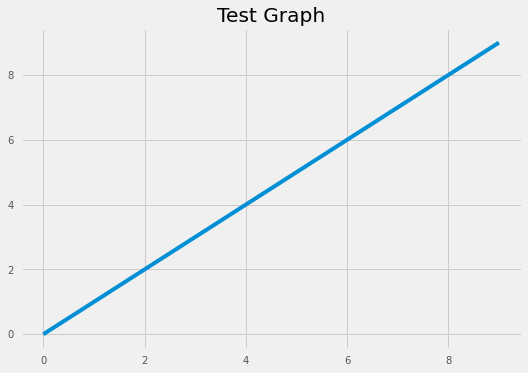

In [8]:
plt.plot(np.arange(0,10), np.arange(0,10))

plt.title("Test Graph")